<a href="https://colab.research.google.com/github/Valmir-unicap/Topicos-avancado-computacao-1/blob/main/Atividade_desafio_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dimensões da imagem: 714x682


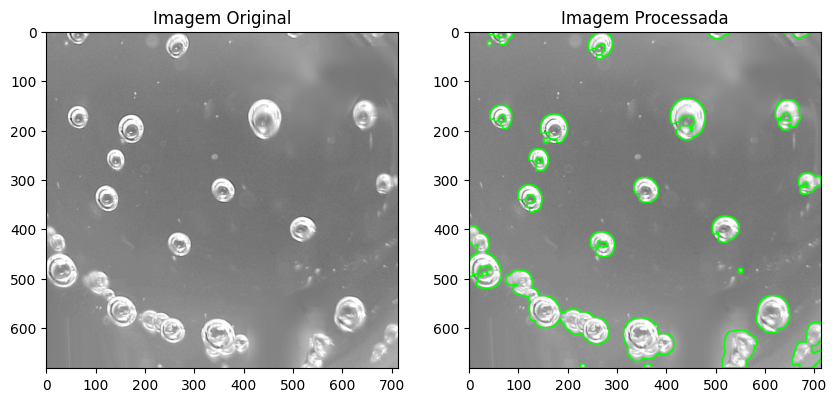

Relação da área ocupada pelas bolhas: 0.113760
Número de bolhas distintas: 26
Diâmetro da menor bolha detectada: 0.028610 cm


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagem = cv2.imread('/content/FigP1127(bubbles).png', cv2.IMREAD_GRAYSCALE)

if imagem is None:
    print("Erro ao carregar a imagem.")
    exit()

altura, largura = imagem.shape
print(f"Dimensões da imagem: {largura}x{altura}")

imagem_suavizada = cv2.GaussianBlur(imagem, (5, 5), 0)

_, imagem_bin = cv2.threshold(imagem_suavizada, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((5,5), np.uint8)
imagem_erodida = cv2.erode(imagem_bin, kernel, iterations=1)
imagem_dilatada = cv2.dilate(imagem_erodida, kernel, iterations=2)

contornos, _ = cv2.findContours(imagem_dilatada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not contornos:
    print("Nenhum contorno foi detectado.")
    exit()

area_total_bolhas_pixels = sum(cv2.contourArea(c) for c in contornos)

pixel_to_cm2 = 7 / (700 * 700)
area_total_bolhas_cm2 = area_total_bolhas_pixels * pixel_to_cm2

relacao_area = area_total_bolhas_cm2 / 7

numero_de_bolhas = len(contornos)

imagem_colorida = cv2.cvtColor(imagem, cv2.COLOR_GRAY2BGR)

for contorno in contornos:
   cv2.drawContours(imagem_colorida, [contorno], -1, (0, 255, 0), 2)

imagem_colorida = cv2.cvtColor(imagem_colorida, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.subplot(1, 2, 2)
plt.imshow(imagem_colorida)
plt.title('Imagem Processada')
plt.show()

menor_contorno = min(contornos, key=cv2.contourArea)
menor_area = cv2.contourArea(menor_contorno)

if menor_area == 0:
    print("A menor área detectada é 0, indicando um problema na detecção de contornos.")
else:
    diametro_menor_bolha = (4 * menor_area / np.pi)**0.5

    diametro_menor_bolha_cm = diametro_menor_bolha * (np.sqrt(pixel_to_cm2))
    print(f"Relação da área ocupada pelas bolhas: {relacao_area:.6f}")
    print(f"Número de bolhas distintas: {numero_de_bolhas}")
    print(f"Diâmetro da menor bolha detectada: {diametro_menor_bolha_cm:.6f} cm")

# Nova seção